In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style='white', context='notebook', palette='deep')

# Data preparation
### Loading data

In [6]:
train_data = pd.read_csv("data/mnist-csv-data/train.csv")
test_data = pd.read_csv("data/mnist-csv-data/test.csv")

In [7]:
train_data.shape


(42000, 785)

In [9]:
train_data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
# remove label from our dataset and store it to x variable
# store our label to y variable
x = train_data.drop('label',axis =1)
y = train_data[['label']]
y.label.value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

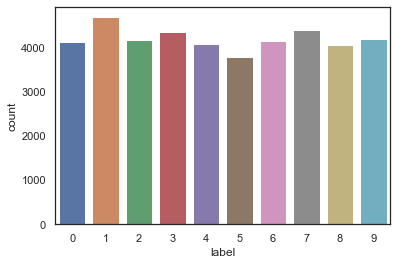

In [40]:
#see distribution of labels overall dataset 

sns.countplot(train_data['label'])


### Check for missing values

In [46]:
train_data.isnull().any().describe()

count       785
unique        1
top       False
freq        785
dtype: object

### Visualize value


In [39]:
# At each row one digit is stored 
#Lets check with one row and print what exaclty stored there
some_digit = x.iloc[1800]

#our data is in 28*28 matrix , so lets reshape it to draw
some_digit = some_digit.values.reshape(28,28)
some_digit

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11,  92,
        254, 253, 254, 253, 193,  51,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 173, 252,
        253, 252, 253, 252, 253, 232,  41,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

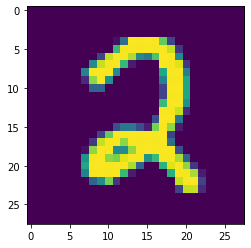

In [27]:
plt.imshow(some_digit)

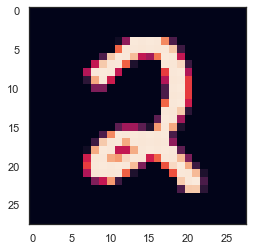

In [96]:
# create a function to plot digits

def plot_digit(data):
    image = data.values.reshape(28, 28)
    plt.imshow(image)
    plt.axis("off")
plot_digit(x.iloc[1800])

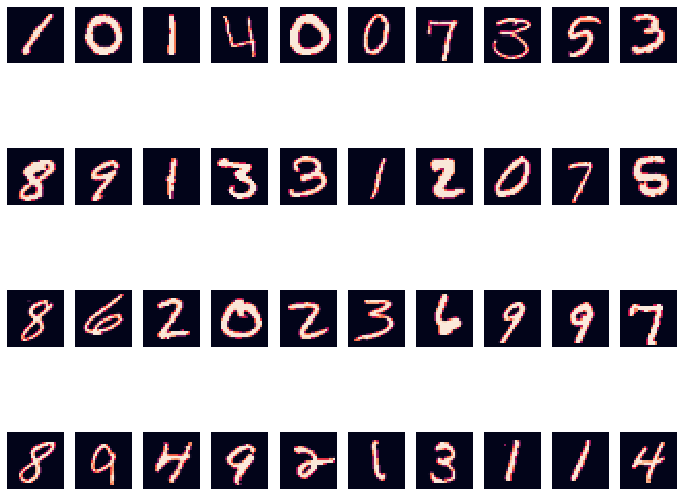

In [99]:
#Plotting top 40 values

plt.figure(figsize=(12,10))
x_val, y_val = 10, 4
for i in range(40):  
    plt.subplot(y_val, x_val, i+1)
    plt.imshow(x.iloc[i].values.reshape((28,28)))
    plt.axis("off")
#     plt.set_title(str(int(y.iloc[i])), color= 'black', fontsize=25)
plt.show()

## Split data into train and test dataset
### Custom method to split dataset

In [70]:
# write your own split logic
# passing data and ratio as argument

def split_train_test(data, test_ratio):
    np.random.seed(42)                                    # setting seed to get same split
    shuffled_idx = np.random.permutation(len(data))        # get random numbers from 0-len(data)
    test_set_size = int(len(data) * test_ratio)           # getting test_size multiply len(data) with ratio
    test_idx = shuffled_idx[:test_set_size]             # extract test index from random numbers
    train_idx = shuffled_idx[test_set_size:]            # extract train index from random nmbers
    
    return data.iloc[train_idx], data.iloc[test_idx]    #now we have indexes for our train and test data return both dataframe


In [72]:

train_set, test_set = split_train_test(train_data, 0.2)

print(len(train_set), "train + ", len(test_set), "test")

33600 train +  8400 test


### Using Sklearn

In [73]:

dataset = pd.read_csv("data/mnist-csv-data/train.csv")
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(dataset, test_size=0.2, random_state=29)

In [76]:
train_set.shape

(33600, 785)

In [77]:
test_set.shape

(8400, 785)

In [78]:
# Removing label from data and split into all training and testing set with X, Y variables 
X_train, y_train = train_set.drop('label', axis=1), train_set[['label']]
X_test, y_test = test_set.drop('label', axis=1), test_set[['label']]

In [89]:
y_test.head()                 # y train and test wil have all labels only

,label
10392,1
15533,0
9127,2
39345,5
35726,1


## Create a binary Clasifier
### Check Number is even number or odd number from image

In [91]:

# classified into whether its even number or odd number

y_train_2 = (y_train % 2 == 0) # true if number is even 
y_test_2 = (y_test % 2 == 0)
y_test_2.head()

,label
10392,False
15533,True
9127,True
39345,False
35726,False


In [92]:
import warnings
warnings.filterwarnings('ignore')

In [122]:

from sklearn.linear_model import SGDClassifier

sgd_clf_even_number = SGDClassifier(random_state=29)
sgd_clf_even_number.fit(X_train, y_train_2)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=29, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

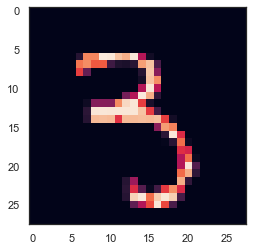

In [123]:
plot_digit(x.iloc[1820])

In [124]:
# Our model is able to predict weather number is Even or odd
sgd_clf_even_number.predict(x.iloc[[1820]])


array([False])

In [126]:

from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf_even_number, X_train, y_train_2, scoring="accuracy", cv=3)

array([0.83769306, 0.83723214, 0.87864988])

In [128]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf_even_number, X_train, y_train_2, cv=3)

In [129]:

from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_2, y_train_pred)

array([[15279,  1948],
       [ 3052, 13321]], dtype=int64)

In [130]:
from sklearn.metrics import f1_score

f1_score(y_train_2, y_train_pred)

0.8419821755894065

In [132]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_2, y_train_pred)

0.8502586231735565

## Multilabel Classifier

### To predict number grater than 6 and divisible by 2 or not

In [133]:
y_train_gt_6 = (y_train > 6) # no. greater than 6
y_train_even = (y_train % 2 == 0) # even number
y_multilable = np.c_[y_train_gt_6, y_train_even] # np.c_ for concatenation of numpy slices

In [134]:
y_multilable

array([[False,  True],
       [False,  True],
       [False,  True],
       ...,
       [False,  True],
       [ True, False],
       [False,  True]])

In [135]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilable)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

array([[False, False]])

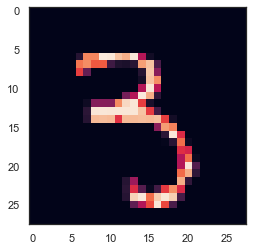

In [138]:

# now to make the predictions
plot_digit(x.iloc[1820])
knn_clf.predict(x.iloc[[1820]])
# below number is 3 and it is neither grater than 6 and neither divisible by 2

In [140]:
from sklearn.ensemble import RandomForestClassifier
# Train model using random forect classifier

rf_clf = RandomForestClassifier(random_state=29)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=29, verbose=0,
                       warm_start=False)

In [142]:
y_test_pred = rf_clf.predict(X_test)
y_test_pred

array([1, 0, 2, ..., 7, 5, 4], dtype=int64)

In [143]:
result = pd.DataFrame(y_test_pred).reset_index()           # store result into dataframe
result.head()

,index,0
0,0,1
1,1,0
2,2,2
3,3,3
4,4,1


In [144]:
result.columns = ['ImageId', 'Label']
result.head(2)

,ImageId,Label
0,0,1
1,1,0


In [145]:
result['ImageId'] = result['ImageId'].apply(lambda x: x+1) # just increment row ids by 1
result.head(2)

,ImageId,Label
0,1,1
1,2,0


#### Model Performance evaluation

In [150]:
confusion_matrix(y_test, y_test_pred)     # confusion matrix for all prediction

array([[808,   0,   3,   4,   2,   4,   3,   0,   5,   0],
       [  0, 901,  11,   0,   0,   3,   3,   4,   4,   2],
       [  4,   6, 789,   8,   2,   2,   6,  11,   7,   3],
       [  4,   1,  24, 778,   0,  16,   1,  10,  17,   6],
       [  3,   5,   8,   2, 777,   1,   4,   3,   3,  27],
       [ 11,   0,   1,  23,   8, 691,  12,   2,  10,   7],
       [  6,   4,   5,   0,   3,  10, 850,   0,   4,   0],
       [  3,   1,  12,   4,   9,   0,   0, 804,   0,  18],
       [  2,   8,  11,  30,   8,  14,   2,   2, 738,  11],
       [  5,   6,   4,  11,  25,   5,   3,  12,  10, 710]], dtype=int64)

In [151]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_test_pred)

0.934047619047619